In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from keras.layers import Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from random import randrange as rand
from sklearn.feature_selection import SelectFromModel


In [3]:
df = pd.read_csv(r"D:\Documents\University\DataAnalytics\Complete_Dataset_updated(in) (1).csv")
df['Date'] = pd.to_datetime(df['Date'])
#df.index = df.pop('Date')
df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,...,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,2022-07-06,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,2022-07-06,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,2022-07-06,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,2022-07-06,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,2022-07-06,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,Q4,1,31.915926,10.798575,...,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839
308,2023-03-01,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,...,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,4.237497
309,2023-03-01,60,155,2,-20.446937,-54.839311,S1,0,45.493257,8.218142,...,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.537497
310,2023-03-01,60,156,1,-20.446972,-54.839168,S2,0,43.740695,8.313133,...,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,4.834511


-----------------------------Feature Selection
---------------------------------------------------------------------------------------------

In [4]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [5]:
features = ['DM','TDN_based_ADF','NDVI','NDWI','LAI','DVI',
            'GCI','GEMI','SAVI','TEMP_MIN','RAD_SOL','EVAPOT',
            'HUM_REL','Dew_Point','Longwave_Rad_AVG']#'Biomass']
features1 = ['DM','TDN_based_ADF','NDVI','NDWI','LAI','DVI',
            'GCI','GEMI','SAVI','TEMP_MIN','RAD_SOL','EVAPOT',
            'HUM_REL','Dew_Point','Longwave_Rad_AVG','Biomass']

In [6]:
groupdf = df.groupby('Date')[features1].mean().reset_index()

In [7]:
def split_data(df, features, target, test_size=0.2, random_state=0):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    #print(X_test.shape, X_train.shape)
    return X_train, X_test, y_train, y_test

def select_features(X_train, y_train, X_test, k=2):
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    return X_train_selected, X_test_selected, selected_features

def train_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    return model

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2
def calculate_r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [ ]:
#X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass')

best_r2_score = 0
random_state = 0
'''for i in range(5000):
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state=i)
    X_train_selected, X_test_selected, selected_features = select_features(X_train, y_train, X_test, k=10)

    model = train_model(X_train_selected, y_train, LinearRegression())
    y_pred = model.predict(X_test_selected)

    r2_initial_score = r2_score(y_test, y_pred)

    if r2_initial_score > best_r2_score:
        best_r2_score = r2_initial_score
        best_random_state = i'''
for i in range(5000):
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state = 12)
    model = train_model(X_train, y_train, DecisionTreeRegressor())
    sfm = SelectFromModel(model)
    sfm.fit(X_train, y_train)
    selected_features = X_train.columns[sfm.get_support()]
  
  
  
    X_train_selected = sfm.transform(X_train)
    X_test_selected = sfm.transform(X_test)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    r2_initial_score = r2_score(y_test, y_pred)

    if r2_initial_score > best_r2_score:
        best_r2_score = r2_initial_score
        best_random_state = i
print("Best random state:", best_random_state)
print("Best R2 score", best_r2_score)
print("Best random state:", best_random_state)
print("Best R2 score", best_r2_score)

#######SelectKBest########
######DecisionTree########
###343 for 2 best features
###926 for 5 best features
####LinearRegression######
###470 for 2 best features
###966 for 5 best features


######SelectFromModel######
######DecisionTree#########
###78 for best r2
######LinearRegression#####
###0 for best r2

SelectKbest:
    DecisionTree;
        343 for 2 features
        926 for 5 features
    LinearRegression:
        470 for 2 features
        966 for 5 features
SelectFromModel:
    DecisionTree:
        78
    LinearRegression:
        0

Feature Selection Models


In [155]:
def plot_feature_selection_comparison():
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state=2746)
    X_train_selected, X_test_selected, selected_features = select_features(X_train, y_train, X_test, k=10)
    model1 = train_model(X_train_selected, y_train, DecisionTreeRegressor())
    y_pred1 = model1.predict(X_test_selected)
  
    model2 = train_model(X_train, y_train, DecisionTreeRegressor())
    sfm = SelectFromModel(model2)
    sfm.fit(X_train, y_train)
    selected_features2 = X_train.columns[sfm.get_support()]
    X_train_selected2 = sfm.transform(X_train)
    X_test_selected2 = sfm.transform(X_test)
    model2.fit(X_train_selected2, y_train)
    y_pred2 = model2.predict(X_test_selected2)
  
    plt.scatter(y_test, y_pred1, alpha=0.5, label='SelectKBest')
    plt.scatter(y_test, y_pred2, alpha=0.5, label='SelectFromModel')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Biomass')
    plt.ylabel('Predicted Biomass')
    plt.legend()
  
    plt.tight_layout()
    plt.show()
  

def DecisionTreeFeature():
    print("Decision Tree Feature Selection")
    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state = 2746)

    #Instantiate the feature selection model and fit the model on the training data
    #Then transform the training and testing sets to keep only the selected Features
    X_train_selected, X_test_selected, selected_features = select_features(X_train, y_train, X_test, k=10)

    #Choose the training model and train it on the selected features
    model = train_model(X_train_selected, y_train, DecisionTreeRegressor())

        #Make predictions on the testing sets
    y_pred = model.predict(X_test_selected)

    #Calculate the regression etric
    mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)
  
    #preddf = df.copy()
    #preddf['Predicted_Biomass'] = y_pred
  
  
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print(" ")
    print("Best 5 features:", selected_features)
    print(" ")


def SelectFromModelFeature():
    print("SelectFromModel Feature Selection")
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state = 78)
    model = train_model(X_train, y_train, DecisionTreeRegressor())
    sfm = SelectFromModel(model)
    sfm.fit(X_train, y_train)
    selected_features = X_train.columns[sfm.get_support()]

    X_train_selected = sfm.transform(X_train)
    X_test_selected = sfm.transform(X_test)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print(" ")
    print("Best 5 features:", selected_features)
    print(" ")
    #preddf = df.copy()
    #preddf['Predicted_Biomass'] = y_pred


In [181]:
DecisionTreeFeature()
SelectFromModelFeature()


Decision Tree Feature Selection
MAE: 745.9815602691489
MSE: 4709397.578811097
RMSE: 2170.1146464671165
R2: 0.4985683910010128
 
Best 5 features: Index(['TDN_based_ADF', 'NDVI', 'NDWI', 'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI',
       'RAD_SOL', 'EVAPOT'],
      dtype='object')
 
SelectFromModel Feature Selection
MAE: 721.2124115319149
MSE: 2207838.781704145
RMSE: 1485.879800557281
R2: 0.8049821539783639
 
Best 5 features: Index(['DM', 'TDN_based_ADF', 'NDWI', 'GEMI'], dtype='object')
 


### -----------------------------Forecasting Models
---------------------------------------------------------------------------------------------

---



In [77]:
def ExponentialSmoothing():
    Y = groupdf['Biomass']
    Biomass = groupdf['Biomass']
    alpha_values = [0.1,0.5, 0.9]
    forecast = [Biomass[0]]
    for alpha in alpha_values:
        for t in range(1, len(Biomass)):
            forecast.append(forecast[-1] + alpha * (Biomass.iloc[t] - Biomass.iloc[t-1]))
    plt.figure(figsize=(20,4))
    plt.plot(groupdf['Date'], Y, label='Actual Data', marker='', color='red', linewidth=2)

    for alpha in alpha_values:
        smoothed = [Y.iloc[0]]
        for t in range(1, len(Y)):
            smoothed.append(alpha * Y.iloc[t] + (1 - alpha) * smoothed[-1])
        plt.plot(groupdf['Date'], smoothed, label=f'Biomass = {alpha}', linestyle='-')

    plt.title('Exponential Smoothing with Different Alpha Values')
    plt.xlabel('Date')
    plt.ylabel('Biomass')
    plt.legend()
    plt.show()
def ExponentialSmoothing2():
    Y = df['Biomass']
    Biomass = df['Biomass']
    alpha_values = [0.1,0.5, 0.9]
    forecast = [Biomass[0]]
    for alpha in alpha_values:
        for t in range(1, len(Biomass)):
            forecast.append(forecast[-1] + alpha * (Biomass.iloc[t] - Biomass.iloc[t-1]))
    plt.figure(figsize=(20,4))
    plt.plot(Y, label='Actual Data', marker='', color='red', linewidth=2)

    for alpha in alpha_values:
        smoothed = [Y.iloc[0]]
        for t in range(1, len(Y)):
            smoothed.append(alpha * Y.iloc[t] + (1 - alpha) * smoothed[-1])
        plt.plot(smoothed, label=f'Biomass = {alpha}', linestyle='-')

    plt.title('Exponential Smoothing with Different Alpha Values')
    plt.xlabel('Date')
    plt.ylabel('Biomass')
    plt.legend()
    plt.show()
def drawExponentialGraph():
    ExponentialSmoothing()
    ExponentialSmoothing2()

In [36]:
scaler = MinMaxScaler()
Xfeatures = ['TDN_based_ADF', 'NDVI', 'NDWI', 'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI','RAD_SOL', 'EVAPOT']
df[Xfeatures] = scaler.fit_transform(df[Xfeatures])

In [37]:
X = df[Xfeatures]
y = df['Biomass']

------------------Regression Models-------------------

Best seed = 999

In [123]:
def DecisionTreeForecast():
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state = 999)
    model = train_model(X_train, y_train, DecisionTreeRegressor())
    y_pred = model.predict(X_test)
    
    validationDataFrame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    predictionDataFrame = df[['Biomass', 'Date']]
    r2 = calculate_r2(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    X_combined = np.concatenate((X_train, X_test), axis=0)
    fullPrediction = model.predict(X_combined)
    predictionDataFrame['Predicted_Biomass'] = fullPrediction.flatten()
    return validationDataFrame, predictionDataFrame, r2, mse, mae


In [18]:
'''best_r2 = 0
best_state = 0

for i in range(1, 1001):
    X_train, X_test, y_train, y_test = split_data(df, features, 'Biomass', test_size=0.3, random_state=i)
    model = train_model(X_train, y_train, DecisionTreeRegressor())
    y_pred = model.predict(X_test)
    r2 = calculate_r2(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_state = i

print(f"Best random state: {best_state}")
print(f"Best R2 score: {best_r2:.4f}")'''

Best random state: 999
Best R2 score: 0.9544


----------Neural Network---------------------

Epoch 1/150


C:\Users\Yaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 28530150.0000 - val_loss: 31050286.0000
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 28283284.0000 - val_loss: 31049862.0000
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 30235482.0000 - val_loss: 31049300.0000
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 30743464.0000 - val_loss: 31048526.0000
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31254900.0000 - val_loss: 31047306.0000
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29186460.0000 - val_loss: 31044942.0000
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28504354.0000 - val_loss: 31038540.0000
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26217952.0000 - val_loss: 31012396.0000
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 28244274.0000 - val_loss: 30862848.0000
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26373384.0000 - val_loss: 30193250.0000
Epoch 11/150
7/7 ━━━━━━━━━━━━━

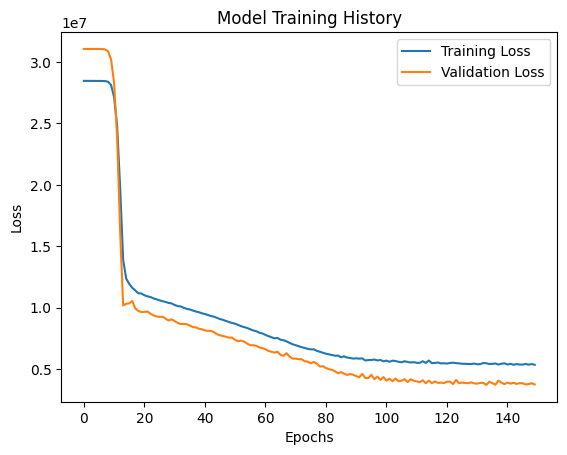

In [81]:
def RandomSplitSeed(i = 500):
  #i = rand(i, 1000)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = RandomSplitSeed()
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)
def LSTMModel():
  model = Sequential([
      LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
      LSTM(100, activation='relu', return_sequences=True),
      LSTM(75, activation='relu', return_sequences=True),
      LSTM(50, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
  ])
  model.compile(optimizer='adam', loss='mse')

  #StopFitting = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)



  X_combined = np.concatenate((X_train, X_test), axis=0)
  predictions = model.predict(X_test)



  r2 = r2_score(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  print(r2)


  X_combined = np.concatenate((X_train, X_test), axis=0)
  fullPrediction = model.predict(X_combined)
  df['Predicted_Biomass'] = fullPrediction.flatten()



  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Model Training History')
  plt.show()
  return r2, mse, mae
r2, mse, mae = LSTMModel()

In [104]:
df[['Biomass', 'Predicted_Biomass']]


,Biomass,Predicted_Biomass
0,2943.000000,5922.194336
1,2943.000000,4975.655762
2,2855.333333,2756.575195
3,2855.333333,4868.042969
4,3058.666667,2236.491943
...,...,...
307,2261.000000,9747.458008
308,15634.666670,2767.077881
309,15634.666670,3770.649902
310,12139.333330,3628.758789


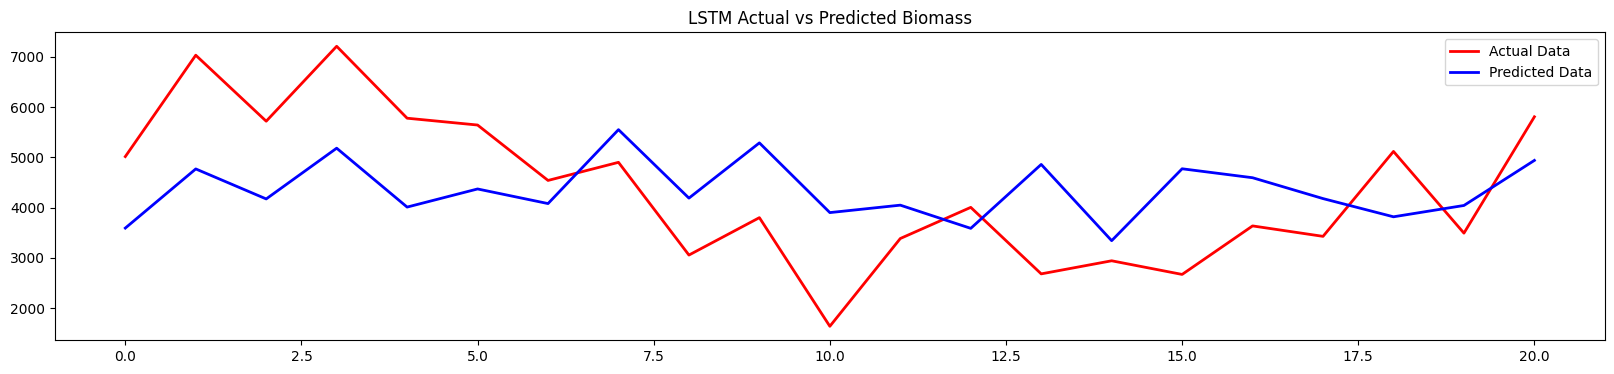

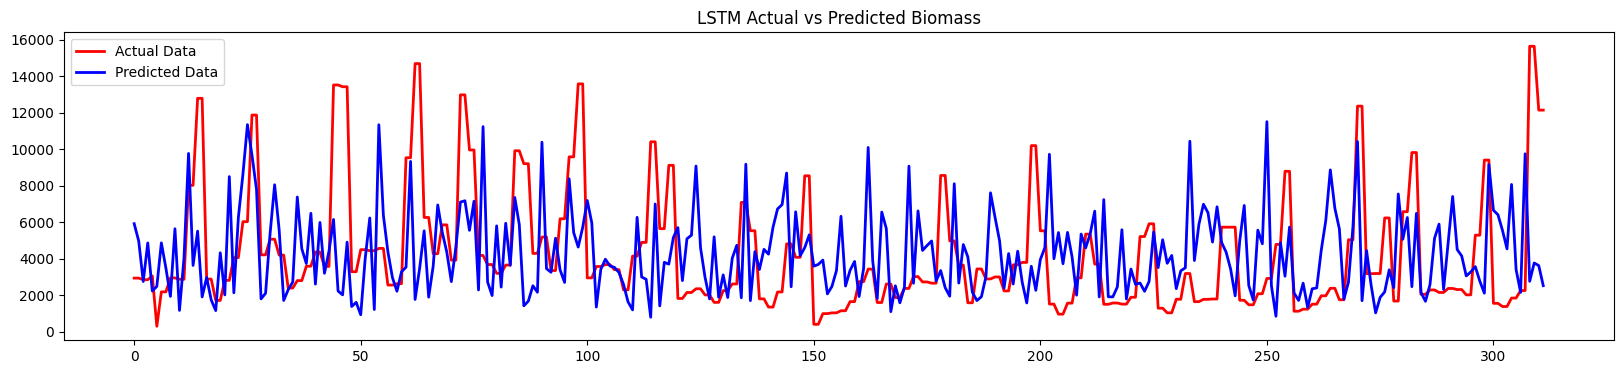

In [130]:
preddf = df.groupby('Date')[['Biomass', 'Predicted_Biomass']].mean().reset_index()
plt.figure(figsize=(20,4))

#plt.plot(preddf['Date'], preddf['Biomass'], label='Actual Data', marker='', color='red', linewidth=2)
#plt.plot(preddf['Date'], preddf['Predicted_Biomass'], label='Predicted Data', marker='', color='blue', linewidth=2)


plt.plot(preddf['Biomass'], label='Actual Data', marker='', color='red', linewidth=2)
plt.plot(preddf['Predicted_Biomass'], label='Predicted Data', marker='', color='blue', linewidth=2)
plt.title('LSTM Actual vs Predicted Biomass')
plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.plot(df['Biomass'], label='Actual Data', marker='', color='red', linewidth=2)
plt.plot(df['Predicted_Biomass'], label='Predicted Data', marker='', color='blue', linewidth=2)
plt.title('LSTM Actual vs Predicted Biomass')
plt.legend()

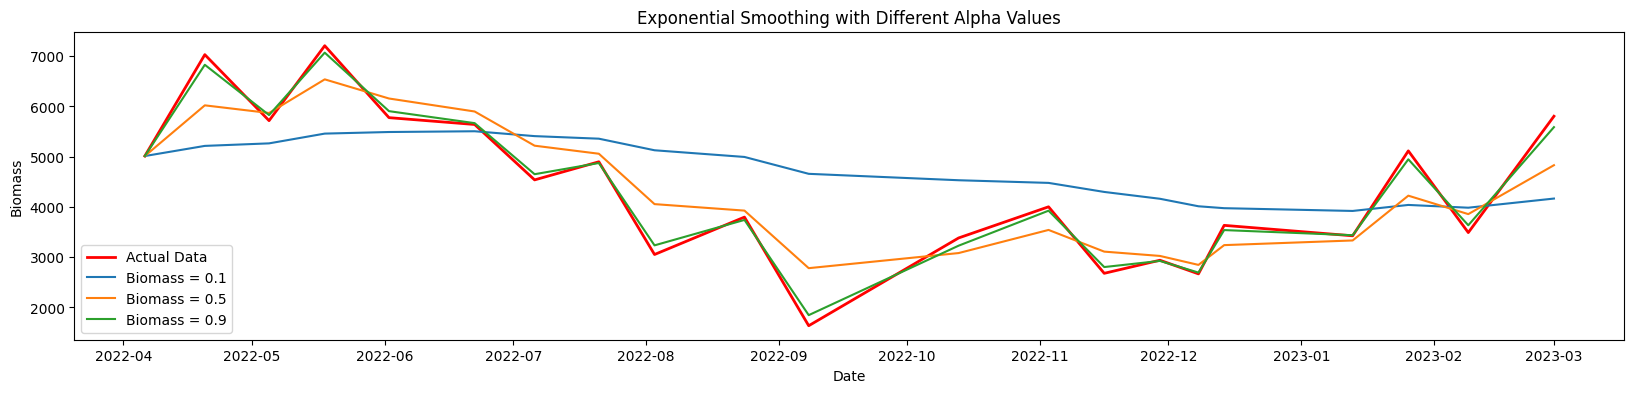

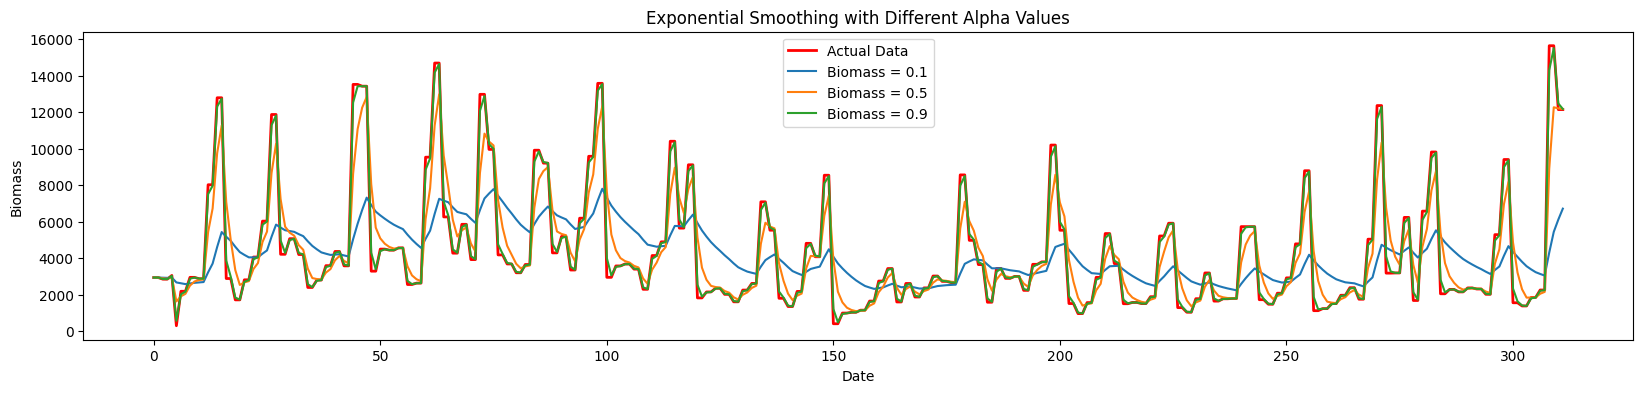

In [87]:
drawExponentialGraph()

In [124]:
dvdf, dpdf, dr2, dmse, dmae = DecisionTreeForecast()

C:\Users\Yaman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yaman\AppData\Local\Temp\ipykernel_8320\901706013.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictionDataFrame['Predicted_Biomass'] = fullPrediction.flatten()


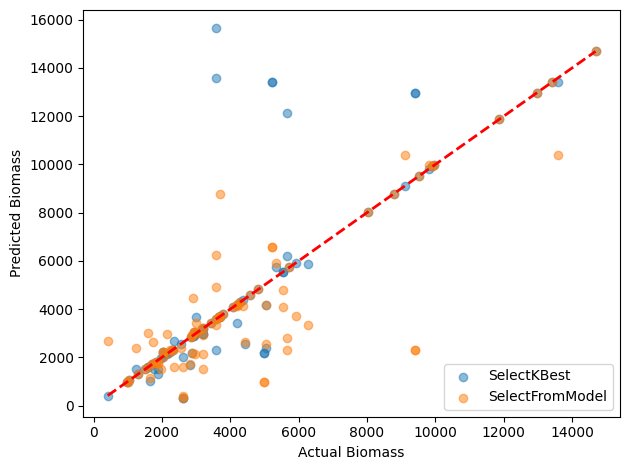

In [182]:
plot_feature_selection_comparison()

C:\Users\Yaman\AppData\Local\Temp\ipykernel_8320\1985494478.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, c='b')


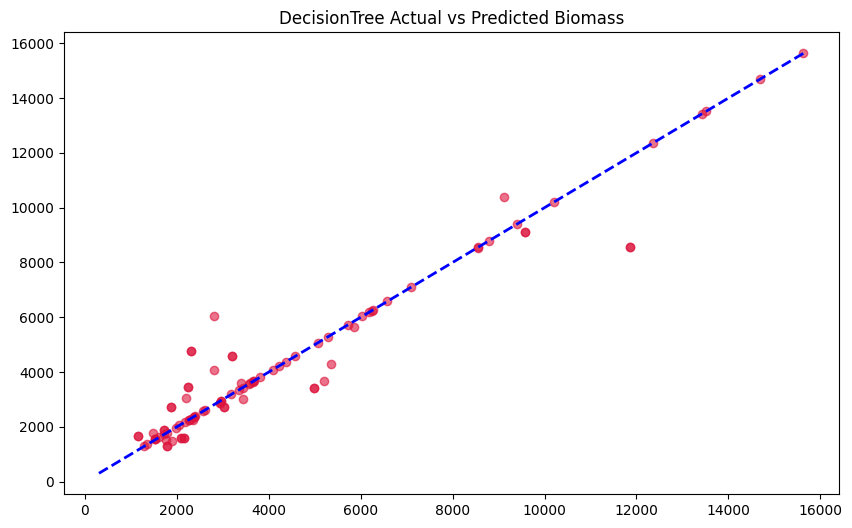

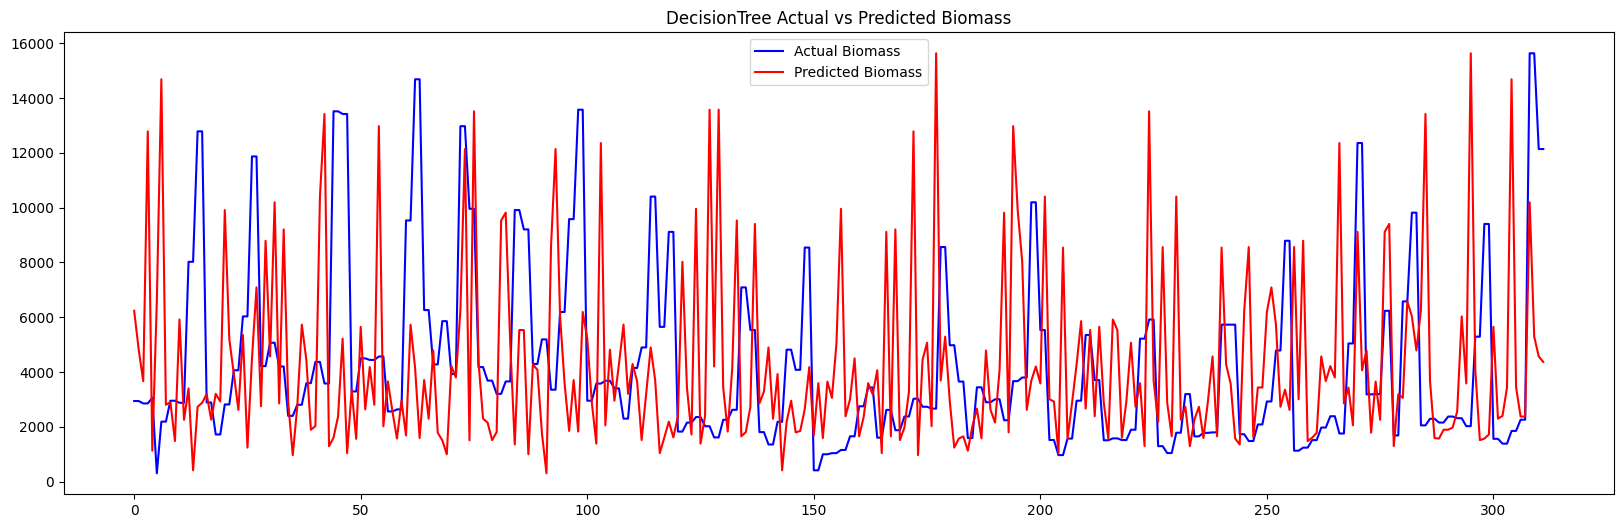

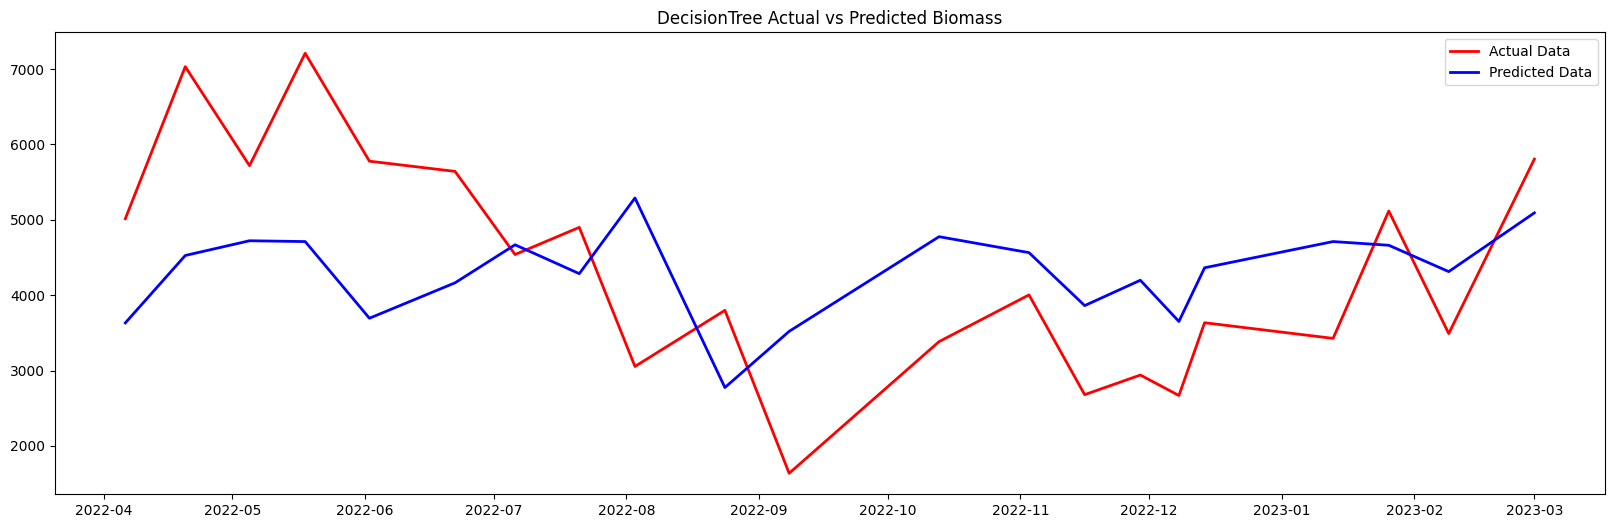

In [184]:
preddf = dpdf.groupby('Date')[['Biomass', 'Predicted_Biomass']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(dvdf['Actual'], dvdf['Predicted'], c='crimson', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, c='b')
plt.title('DecisionTree Actual vs Predicted Biomass')
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(dpdf['Biomass'], c='b', label = 'Actual Biomass')
plt.plot(dpdf['Predicted_Biomass'], c='r', label = 'Predicted Biomass')
plt.title('DecisionTree Actual vs Predicted Biomass')
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(preddf['Date'], preddf['Biomass'], label='Actual Data', marker='', color='red', linewidth=2)
plt.plot(preddf['Date'], preddf['Predicted_Biomass'], label='Predicted Data', marker='', color='blue', linewidth=2)
plt.title('DecisionTree Actual vs Predicted Biomass')
plt.legend()
plt.show()

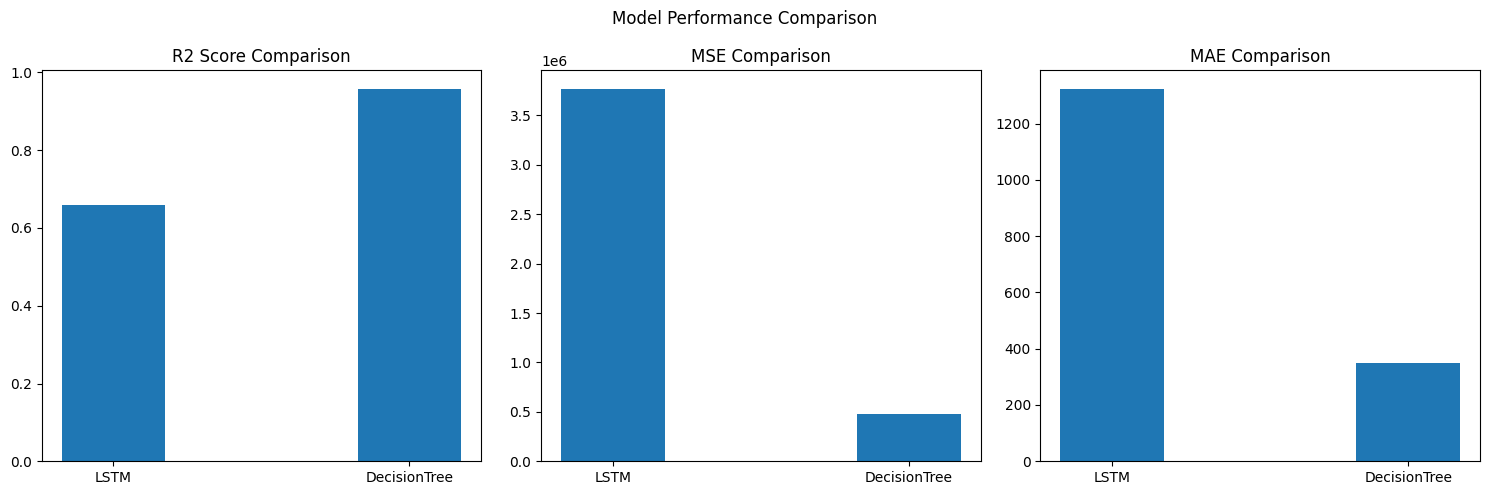

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

models = ['LSTM', 'DecisionTree']
metrics = ['R2', 'MSE', 'MAE']
values = [r2, mse, mae]
values2 = [dr2, dmse, dmae]
width = 0.35
index = np.arange(2)

ax1.bar(index, [values[0], values2[0]], width, label=models)
ax1.set_title('R2 Score Comparison')
ax1.set_xticks(index)
ax1.set_xticklabels(models)

ax2.bar(index, [values[1], values2[1]], width, label=models)
ax2.set_title('MSE Comparison')
ax2.set_xticks(index)
ax2.set_xticklabels(models)

ax3.bar(index, [values[2], values2[2]], width, label=models)
ax3.set_title('MAE Comparison')
ax3.set_xticks(index)
ax3.set_xticklabels(models)

plt.suptitle('Model Performance Comparison')
plt.tight_layout()
plt.show()

The best model that provides us with the most accurate results according to the above calculation metrics is the DecisionTree Regression Model